In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

pd.set_option("display.max_columns", 200)

In [2]:
#Configuração para as figuras
from IPython.core.pylabtools import figsize
figsize(10, 8)
plt.figure(dpi=150)
sns.set()

<Figure size 1500x1200 with 0 Axes>

In [3]:
#Importação dos dados e criação do dataframe principal
df_enem_train = pd.read_csv("train.csv")
df_enem_test = pd.read_csv('test.csv')

In [4]:
#Visualização dos primeiros 7 dados de cada coluna visível
df_enem_train.head(3)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [5]:
df_enem_test.head(3)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A


In [6]:
#Correlação entre as variáveis
df_enem_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,0.005852,-0.003362,-0.006252,0.011372,0.006717,-0.000351,-0.000586,-0.000214,-0.011217,-0.013523,0.019805,0.003334,NaN,0.007724,0.004315,NaN,0.005417,0.004539,0.000268,0.012234,-0.004620,NaN,0.003231,0.001924,0.011940,-0.010889,-0.007018,-0.000171,NaN,0.003136,NaN,0.009824,-0.008707,0.001734,-0.003315,0.001971,0.004186,0.005459,-0.000212,-0.011969,-0.016987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002105,NaN,NaN,NaN,NaN,0.011426,NaN,0.003352,NaN,NaN,NaN,0.004508,0.002816,0.048289,-0.004246,-0.004350,0.017135,0.017135,0.017073,0.017073,0.000970,-0.008336,-0.006097,0.006530,0.007925,0.000369,-0.002789,-0.004959,-0.004945,-0.003911,-0.011240,-0.006711,-0.002971,0.012977,0.000160,0.023548,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,0.025402,-0.032664,0.041738,0.018070,-0.035317,0.983407,0.983630,0.983488,0.080064,-0.055710,0.024364,0.001188,NaN,-0.010872,0.012790,NaN,-0.001965,0.000846,0.012051,0.003969,0.001007,NaN,-0.007271,0.008818,-0.030268,-0.009254,0.000398,-0.014474,NaN,-0.003578,NaN,0.006602,-0.009777,0.013384,-0.005041,0.008562,-0.002133,-0.003706,-0.004674,-0.011169,-0.008567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003576,NaN,NaN,NaN,NaN,0.017423,NaN,0.003713,NaN,NaN,NaN,0.008911,-0.003259,0.991124,0.982100,0.981955,-0.035441,-0.035441,-0.034269,-0.034269,0.085643,0.124272,0.130161,0.108850,-0.098682,-0.017227,0.069971,0.048547,0.051289,0.062718,0.044335,0.061549,-0.117804,-0.073321,-0.079831,-0.025616,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,0.025822,-0.032538,0.041406,0.018145,-0.034944,0.983393,0.983417,0.983552,0.079229,-0.054736,0.024666,0.001360,NaN,-0.010716,0.01303

In [7]:
features_selecionadas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [8]:
#Colunas escolhidas para uso no modelo e criação de novo dataframe
df_enem_vars = df_enem_train[features_selecionadas]

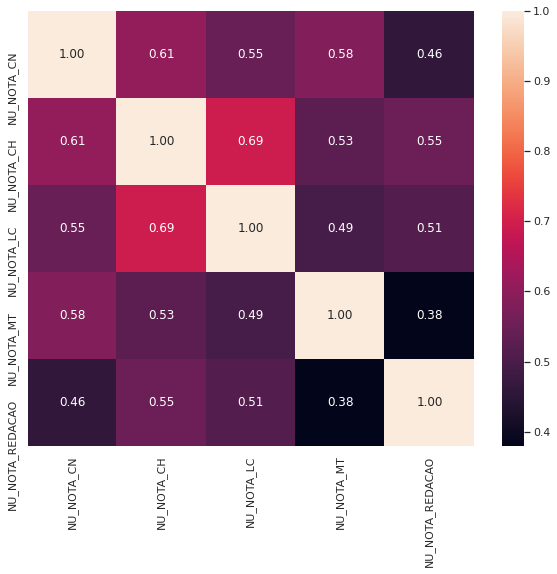

In [9]:
#Mapa de correlação das variáveis selecionadas
sns.heatmap(df_enem_vars.corr(), annot=True, fmt='0.2f')
plt.show()

## Tratamento de todas as variáveis numéricas com valor missing

In [10]:
df_enem_vars.fillna(0, inplace=True)

/home/deive/.local/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
df_enem_vars.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
dtype: int64

In [12]:
df_enem_vars.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000
mean,356.621515,398.923911,381.166737,356.092607,390.447633
std,213.282315,237.174594,234.648409,228.844193,267.749316
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.625000,345.900000,0.000000,0.000000,0.000000
50%,433.100000,499.600000,486.000000,422.500000,480.000000
75%,493.200000,564.400000,548.300000,504.400000,580.000000
max,806.400000,807.000000,763.600000,952.000000,1000.000000


In [13]:
df_enem_vars.NU_NOTA_MT

0        399.4
1        459.8
2          0.0
3          0.0
4          0.0
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64


## Definição das variáveis mais aptas para o modelo através de RFE

In [14]:
from sklearn.feature_selection import RFE
X_enem_df = df_enem_vars.drop('NU_NOTA_MT', axis=1)
y_enem_df = df_enem_vars['NU_NOTA_MT']

In [15]:
vars_enem_2016 = RFE(estimator=LinearRegression(),n_features_to_select=3).fit(X_enem_df,y_enem_df)

In [16]:
list(X_enem_df.columns[vars_enem_2016.support_])

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']

## Treino de modelo com as variáveis selecionadas por RFE

In [17]:
X = df_enem_vars.drop('NU_NOTA_MT', axis=1)
y = df_enem_vars[['NU_NOTA_MT']]
X_train, X_train_predict, y_train, y_train_predict = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
X_train

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
5927,0.0,0.0,0.0,0.0
2422,401.6,374.5,374.1,400.0
4101,0.0,0.0,0.0,0.0
2732,0.0,0.0,0.0,0.0
80,444.3,509.1,530.1,540.0
...,...,...,...,...
5191,0.0,0.0,0.0,0.0
13418,0.0,0.0,0.0,0.0
5390,386.3,414.6,412.9,400.0
860,0.0,0.0,0.0,0.0


In [19]:
X_train_predict

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
12453,388.6,400.8,392.3,360.0
12095,0.0,0.0,0.0,0.0
1575,516.4,482.0,548.6,640.0
3651,738.9,683.8,642.8,680.0
586,0.0,0.0,0.0,0.0
...,...,...,...,...
1444,0.0,0.0,0.0,0.0
9084,402.8,460.5,387.0,0.0
7727,473.1,528.8,547.9,740.0
4237,0.0,0.0,0.0,0.0


In [20]:
y_train

,NU_NOTA_MT
5927,0.0
2422,362.0
4101,0.0
2732,0.0
80,488.3
...,...
5191,0.0
13418,0.0
5390,460.2
860,0.0


In [21]:
y_train_predict

,NU_NOTA_MT
12453,425.2
12095,0.0
1575,439.0
3651,874.1
586,0.0
...,...
1444,0.0
9084,411.9
7727,604.6
4237,0.0


In [22]:
regr_lin = LinearRegression()

In [23]:
regr_lin_model = regr_lin.fit(X_train, y_train)

In [24]:
score_r2_train = regr_lin_model.score(X_train, y_train)
score_r2_predict = regr_lin_model.score(X_train_predict, y_train_predict)
print(f'R² set de treino: {score_r2_train}')
print(f'R² set de previsão: {score_r2_predict}')

R² set de treino: 0.9013444115077054
R² set de previsão: 0.9062855243137223


In [25]:
mean_squared_error(regr_lin_model.predict(X_train_predict), y_train_predict)

5059.829529628248

In [26]:
NU_MT_PRED_TRAIN = regr_lin_model.predict(X_train_predict)

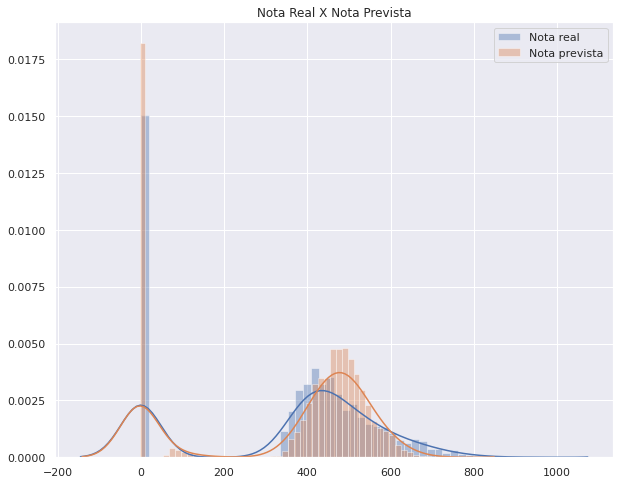

In [27]:
nota_real = "Nota real"
nota_prevista = "Nota prevista"
sns.distplot(y_train_predict, bins=50)
sns.distplot(NU_MT_PRED_TRAIN, bins=50)
plt.legend((nota_real,nota_prevista))
plt.title("Nota Real X Nota Prevista")
plt.show()

### Uso da metodologia Ridge

In [28]:
regr_ridge = Ridge(alpha=1)

In [34]:
score_ridge = cross_val_score(regr_ridge, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [35]:
print(f"Score Ridge: {score_ridge.mean()}")

Score Ridge: -5117.844098731569


In [36]:
ridge_model = regr_ridge.fit(X_train, y_train)

In [37]:
ridge_model.score(X_train, y_train)

0.9013444115077054

In [38]:
ridge_model_notas_predict = ridge_model.predict(X_train_predict)

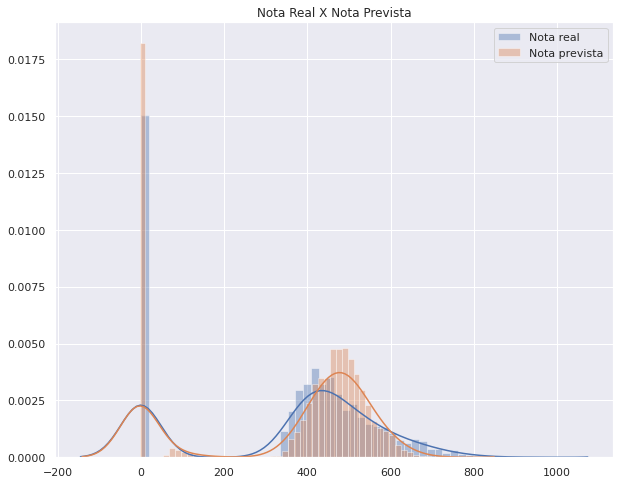

In [39]:
nota_real = "Nota real"
nota_prevista = "Nota prevista"
sns.distplot(y_train_predict, bins=50)
sns.distplot(ridge_model_notas_predict, bins=50)
plt.legend((nota_real,nota_prevista))
plt.title("Nota Real X Nota Prevista")
plt.show()

### Uso da metodologia de Lasso

In [40]:
regr_lasso = Lasso(0.1)

In [41]:
score_lasso = cross_val_score(regr_lasso, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [42]:
print(f"Score Lasso: {score_lasso.mean()}")

Score Lasso: -5117.8445518350145


In [43]:
lasso_model = regr_lasso.fit(X_train, y_train)

In [44]:
lasso_model.score(X_train, y_train)

0.9013444111906601

In [45]:
lasso_model_notas_predict = lasso_model.predict(X_train_predict)

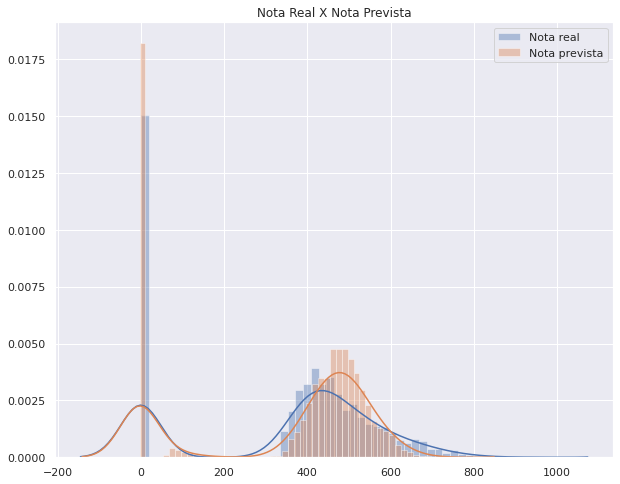

In [46]:
nota_real = "Nota real"
nota_prevista = "Nota prevista"
sns.distplot(y_train_predict, bins=50)
sns.distplot(lasso_model_notas_predict, bins=50)
plt.legend((nota_real,nota_prevista))
plt.title("Nota Real X Nota Prevista")
plt.show()

### Udo da metodologia Ridge com validação cruzada

In [47]:
regr_ridge_cv = RidgeCV(cv=10)
score_ridge_cv = cross_val_score(regr_ridge_cv, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
print(f"Score Ridge CV: {score_ridge_cv.mean()}")

Score Ridge CV: -5117.844098699299


In [48]:
ridge_cv_model = regr_ridge_cv.fit(X_train, y_train)

In [49]:
ridge_cv_model.score(X_train, y_train)

0.9013444115077025

In [50]:
ridge_cv_model_notas_predict = ridge_cv_model.predict(X_train_predict)

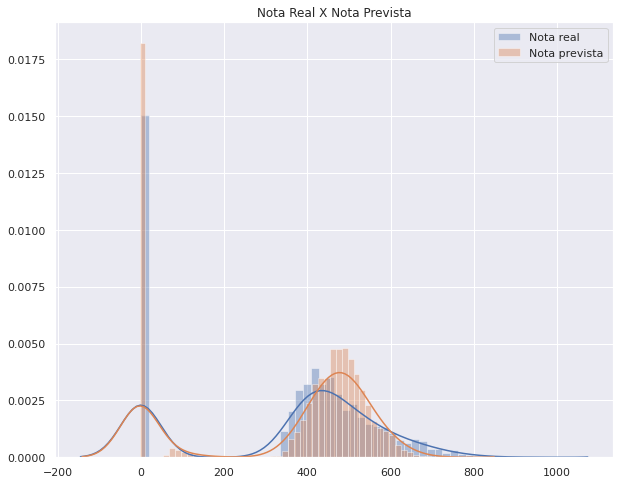

In [51]:
nota_real = "Nota real"
nota_prevista = "Nota prevista"
sns.distplot(y_train_predict, bins=50)
sns.distplot(ridge_cv_model_notas_predict, bins=50)
plt.legend((nota_real,nota_prevista))
plt.title("Nota Real X Nota Prevista")
plt.show()

### Uso da metodologia Lasso com validação cruzada

In [52]:
regr_lasso_cv = LassoCV(cv=10, eps=1e-4)
score_lasso_cv = cross_val_score(regr_lasso_cv, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
print(f"Score Lasso CV: {score_lasso_cv.mean()}")

/home/deive/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/deive/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/deive/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/deive/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

Score Lasso CV: -5117.9137488324295


In [53]:
lasso_cv_model = regr_lasso_cv.fit(X_train, y_train)

/home/deive/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
lasso_cv_model.score(X_train, y_train)

0.9013435224134749

In [55]:
lasso_cv_model_notas_predict = lasso_cv_model.predict(X_train_predict)

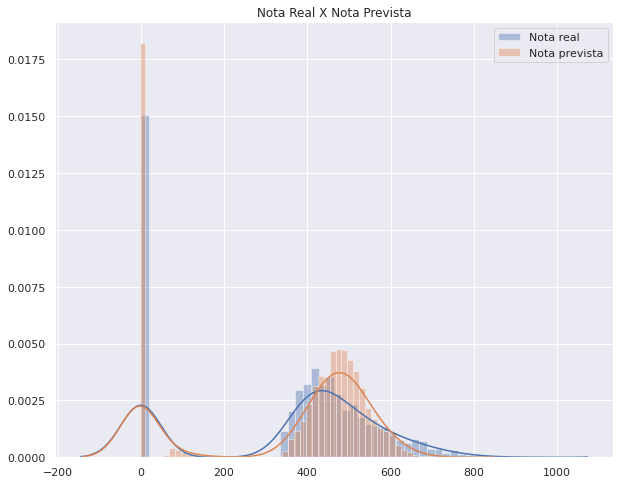

In [56]:
nota_real = "Nota real"
nota_prevista = "Nota prevista"
sns.distplot(y_train_predict, bins=50)
sns.distplot(lasso_cv_model_notas_predict, bins=50)
plt.legend((nota_real,nota_prevista))
plt.title("Nota Real X Nota Prevista")
plt.show()

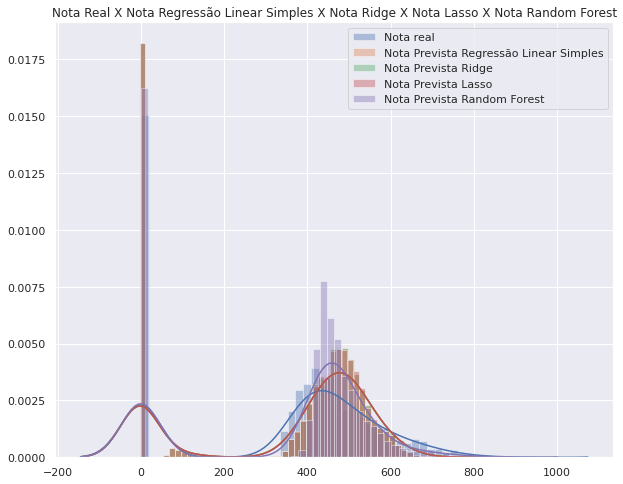

In [65]:
nota_real_leg = "Nota Real"
nota_prevista_regr_lin = "Nota Prevista Regressão Linear Simples"
nota_prevista_ridge_leg = "Nota Prevista Ridge"
nota_prevista_lasso_leg = "Nota Prevista Lasso"
nota_prevista_forest_leg = "Nota Prevista Random Forest"
sns.distplot(y_train_predict, bins=50)
sns.distplot(NU_MT_PRED_TRAIN, bins=50)
sns.distplot(ridge_cv_model_notas_predict, bins=50)
sns.distplot(lasso_cv_model_notas_predict, bins=50)
sns.distplot(model_forest_regressor_notas_preditas, bins=50)
plt.legend((nota_real,nota_prevista_regr_lin, nota_prevista_ridge_leg, nota_prevista_lasso_leg, nota_prevista_forest_leg))
plt.title("Nota Real X Nota Regressão Linear Simples X Nota Ridge X Nota Lasso X Nota Random Forest")
plt.show()

# Modelo Random Forest

In [66]:
forest_regressor = RandomForestRegressor(n_estimators=100, n_jobs=2, random_state=42)

In [67]:
model_forest_regressor = forest_regressor.fit(X_train, y_train)

<ipython-input-67-b13b325aaf74>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest_regressor = forest_regressor.fit(X_train, y_train)


In [68]:
model_forest_regressor.score(X_train, y_train)

0.988111993053508

In [69]:
mean_squared_error(model_forest_regressor.predict(X_train), y_train)

615.767372145868

In [70]:
model_forest_regressor_notas_preditas = model_forest_regressor.predict(X_train_predict)

# Definição das variáveis de teste preditivo para uso no modelo

In [71]:
X_test = df_enem_test[X_train.columns]
X_test.head(7)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.8,443.5,431.8,420.0
1,391.1,491.1,548.0,580.0
2,595.9,622.7,613.6,320.0
3,NaN,NaN,NaN,NaN
4,592.9,492.6,571.4,320.0
5,414.5,568.5,542.5,560.0
6,485.7,654.6,606.6,620.0


In [72]:
#Tratamento de todas as variáveis numéricas com valor missing na base de test
X_test.fillna(0, inplace=True)

/home/deive/.local/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [73]:
X_test.shape

(4576, 4)

In [74]:
X_test.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

## Predição das notas  de Matemática com o dataset de test

In [75]:
NU_NOTA_MT_PREDICT = model_forest_regressor.predict(X_test)

In [76]:
NU_NOTA_MT_PREDICT

array([425.946, 456.472, 586.438, ..., 695.138, 465.804,   0.   ])

In [77]:
NU_NOTA_MT_PREDICT = pd.DataFrame(NU_NOTA_MT_PREDICT, columns=["NU_NOTA_MT"])

In [78]:
NU_NOTA_MT_PREDICT

,NU_NOTA_MT
0,425.946
1,456.472
2,586.438
3,0.000
4,514.183
...,...
4571,455.326
4572,472.714
4573,695.138
4574,465.804


In [79]:
#Preenchimento com valor 0 das notas negativas
NU_NOTA_MT_PREDICT[NU_NOTA_MT_PREDICT["NU_NOTA_MT"] < 0] = 0

In [83]:
NU_NOTA_MT_PREDICT

,NU_NOTA_MT
0,425.946
1,456.472
2,586.438
3,0.000
4,514.183
...,...
4571,455.326
4572,472.714
4573,695.138
4574,465.804


## Criação de novo dataframe com inscrição e nota de matemática

In [81]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_enem_test['NU_INSCRICAO']
df_answer['NU_NOTA_MT'] = NU_NOTA_MT_PREDICT
df_answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,425.946
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,456.472
2,b38a03232f43b11c9d0788abaf060f7366053b6d,586.438
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,514.183


### Exportação do novo arquivo csv com as notas

In [82]:
df_answer.to_csv('answer.csv', index=False)